In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate
import pandas as pd

In [96]:
def pdf(r):
    if (r <= 0):
        return 0
    else:
        return r * r / (1 + np.exp((r - 2) / 0.54))
    
area = scipy.integrate.quad(pdf, 0, 20)[0]

def pdf(r):
    return np.where(r < 0, 0, (r * r / (1 + np.exp((r - 2) / 0.54))) * 1 / area)

def ReadStepSizeFile(stepsize):
    data = pd.read_csv('../data/samples_' + str(stepsize) + '.txt', delim_whitespace=True, header=None)
    
    return data

In [15]:
headers = pd.read_csv('../data/statistics.txt', delim_whitespace=True, nrows=0).columns[1:]
stats = pd.read_csv('../data/statistics.txt', delim_whitespace=True, header=None, skiprows=1, names=headers)

display(stats)

,Stepsize,Acceptance,Autocorrelation
0,0.01,0.9944,0.999732
1,0.02,0.9957,0.998465
2,0.03,0.9897,0.999301
3,0.04,0.9862,0.997598
4,0.05,0.9759,0.998206
...,...,...,...
695,6.96,0.1608,0.805548
696,6.97,0.1676,0.808146
697,6.98,0.1634,0.798640
698,6.99,0.1649,0.811102


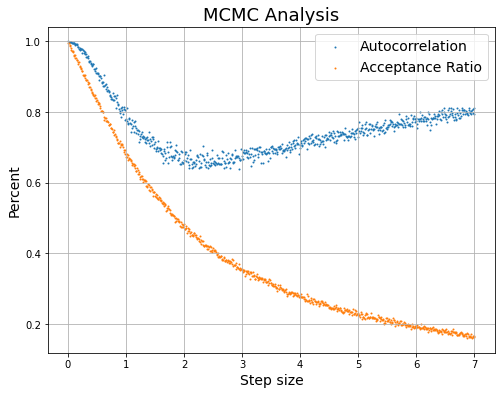

In [16]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(stats['Stepsize'], stats['Autocorrelation'], s=1, label='Autocorrelation')
ax.scatter(stats['Stepsize'], stats['Acceptance'], s=1, label='Acceptance Ratio')

ax.set_ylabel('Percent', fontsize=14)
ax.set_xlabel('Step size', fontsize=14)
ax.set_title('MCMC Analysis', fontsize=18)

ax.grid()
ax.legend(fontsize=14)

plt.show()

In [152]:
for i in np.arange(400, stats.shape[0] + 1, 1):
    data = ReadStepSizeFile(i)
    display(data)
    break

,0
0,2.53350
1,2.53350
2,2.53350
3,2.53350
4,2.53350
...,...
9995,4.39581
9996,3.59956
9997,2.57752
9998,2.57752


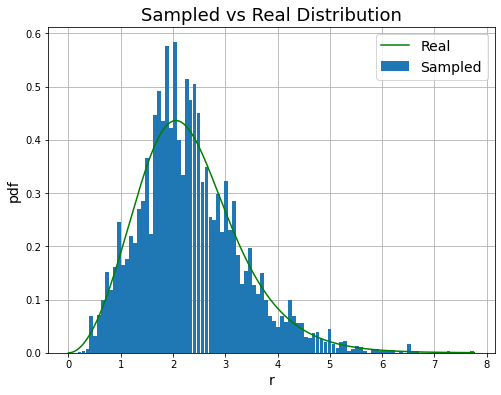

In [151]:
(bars, lims) = np.histogram(data[0], bins=int(data.shape[0] / 100), density=True)
centers = np.convolve(lims, np.ones(2) / 2, mode='valid')


fig, ax = plt.subplots(figsize=(8, 6))

x = np.linspace(min(0, np.min(lims)), max(6, np.max(lims)), 1000)
y = pdf(x)

ax.bar(centers, bars, width=binWidth, zorder=9, label='Sampled')
ax.plot(x, y, zorder=10, c='green', label='Real')

ax.set_xlabel('r', fontsize = 14)
ax.set_ylabel('pdf', fontsize = 14)
ax.set_title('Sampled vs Real Distribution', fontsize = 18)

ax.grid()
ax.legend(fontsize = 14)

plt.show()